<h2> Nauczanie maszynowe/Ćwiczenia10

<h4> Zadanie1: Oblicz $P(B=T, E=T, A=T, J=T, M=F)$

P(B=T)*P(E=T)*P(A=T|B=T,E=T)*P(J=T|A=T)*P(M=F|A=T)= 

In [19]:
0.001*0.002*0.95*0.9*0.3

5.13e-07

<h4> Zadanie2: (oszędność parametrów):
    
- Ile potrzeba parametrów aby opisać rozkład łączny 5 zmiennych binarnych? 
- Ile parametrów ma powyższa sieć? 

- 5 parametrów
- 2 parametry - pozostałe 3 są złożone z tych dwóch (B, E)

<h4> Zadanie3: Wykonaj analogiczne zadanie dla 10 zmiennych binarnych i następującej topologii sieci:

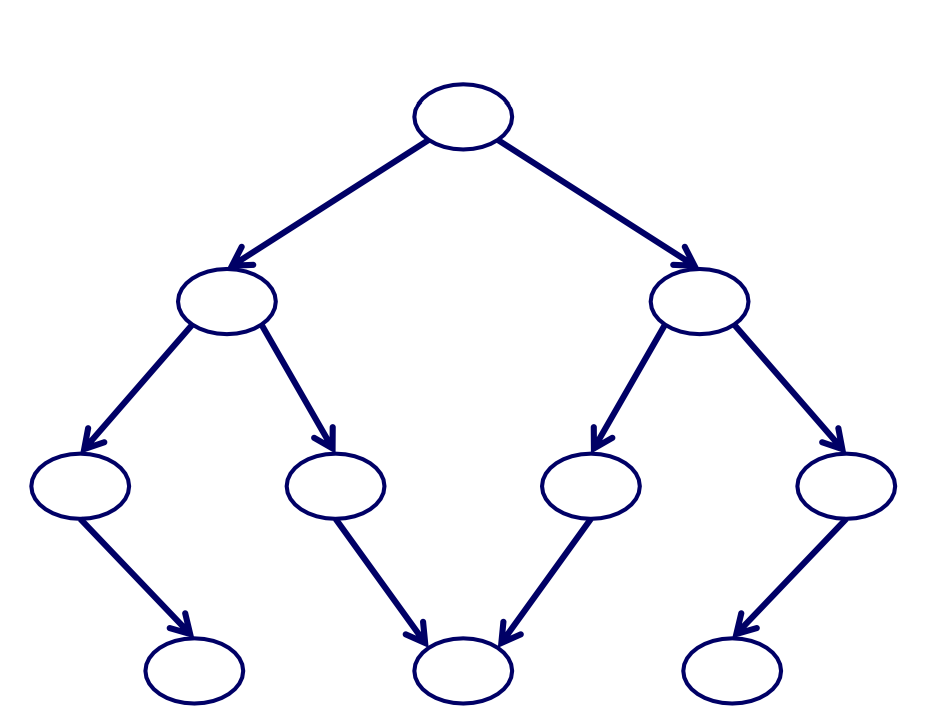

In [18]:
display.Image("nb2.png", width="500", height="500")

- 10 parametrów
- 1 parametr, z którego można złożyć wszystkie inne

In [64]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='K2')) #dodaje pseudozliczenia (1) zeby m.in. wyeliminowac zera

+------------+--------------------+-----+--------------------+
| fruit      | fruit(apple)       | ... | fruit(banana)      |
+------------+--------------------+-----+--------------------+
| size       | size(large)        | ... | size(small)        |
+------------+--------------------+-----+--------------------+
| tasty(no)  | 0.3333333333333333 | ... | 0.6666666666666666 |
+------------+--------------------+-----+--------------------+
| tasty(yes) | 0.6666666666666666 | ... | 0.3333333333333333 |
+------------+--------------------+-----+--------------------+


<h4> Zadanie4: Wyjaśnij wartość 0.75 w powyższej tabeli (poprzez bezpośrednie wyliczenie i objaśnienie).

duze smaczne banany + pseude zliczenie/wszystkie duze banany + 2x pseudozliczenie (smaczne i niesmaczne)<br>
(5+1)/(5+1+1+1)=6/8=0.75

<h4> Zadanie5: Wygeneruj dane zawierające 10 tys wierszy i 3 kolumny. Pierwsze dwie kolumny (A, B) niech zawierają losowe liczby całkowite z zakresu $<-2,2>$. Trzecia kolumna (C) to kombinacja liniowa dwóch pierwszych kolumn $C = 2A-3B$. Zbuduj dwie topologie sieci, tzn. $(A ->C, B->C)$ oraz $(A->B, B->C)$. Oceń która z sieci wydaje sie lepiej odzwierciedlać strukturę danych. Wyjaśnij dlaczego.

In [73]:
import random
data = []
for _ in range(10000):
    A,B= random.randint(-2, 2), random.randint(-2, 2)
    C = 2*A-3*B
    data.append([A,B,C])
data = pd.DataFrame(data, columns = ['A', 'B', 'C'])

In [76]:
model = BayesianNetwork([('A', 'C'), ('B', 'C')])
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu")
bdeu = BDeuScore(data)
k2 = K2Score(data)
bic = BicScore(data)
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))

-32345.597848226393
-34011.815160931124
-34293.68549032032


In [77]:
model = BayesianNetwork([('A', 'B'), ('B', 'C')])
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu")
bdeu = BDeuScore(data)
k2 = K2Score(data)
bic = BicScore(data)
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))

-48494.94135684151
-48760.41529473134
-48779.67387521603


Model a->c, b->c lepiej odzwierciedla dane (większa wartość współczynników) - bo c zalezy od a i b :)

<h4> Zadanie6: Liczba możliwych topologii sieci dla $n$ cech wyraża się następującyc wzorem rekurencyjnym
   

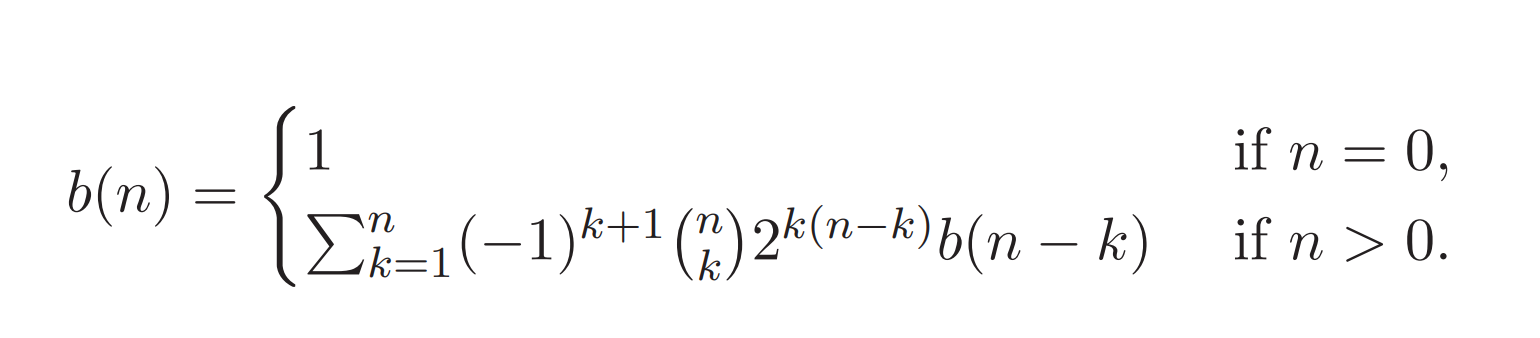

In [39]:
display.Image("bay.png", width="500", height="500")

<h4> Zaimplementuj ten wzór oraz sprawdź go dla 3 cech (przyklad wyżej). Ile możliwych sieci występuje dla 10 cech?

In [52]:
import math
def b(n):
    if n == 0:
        return 1
    elif n > 0:
        return sum([(-1)**(k+1) * math.comb(n, k) * 2**(k * (n - k)) * b(n - k) for k in range(1, n+1)])
    
b(3), b(10)

(25, 4175098976430598143)

Sieci Bayesa opracowano na podstawie:
- https://notebook.community/pgmpy/pgmpy_notebook/notebooks/9.%20Learning%20Bayesian%20Networks%20from%20Data

Do poczytania:

- https://www.frontiersin.org/articles/10.3389/fgene.2019.01196/full
- https://biodatamining.biomedcentral.com/articles/10.1186/1756-0381-6-6
- https://www.nature.com/articles/s42003-022-03243-w